<a href="https://colab.research.google.com/github/nermienkh/BMD212_Spring22/blob/main/feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 

In [2]:
Data= pd.read_csv("/content/drive/MyDrive/BMD212/samples.csv")

In [3]:
ECG=Data.iloc[:,1][1:].apply(lambda x:float(x))

In [4]:
ECG

1      -0.085
2      -0.080
3      -0.070
4      -0.075
5      -0.095
        ...  
4996    0.015
4997    0.030
4998    0.020
4999    0.035
5000    0.040
Name: 'ECG I', Length: 5000, dtype: float64

- Autoregressive coefficents:
a parametric methods
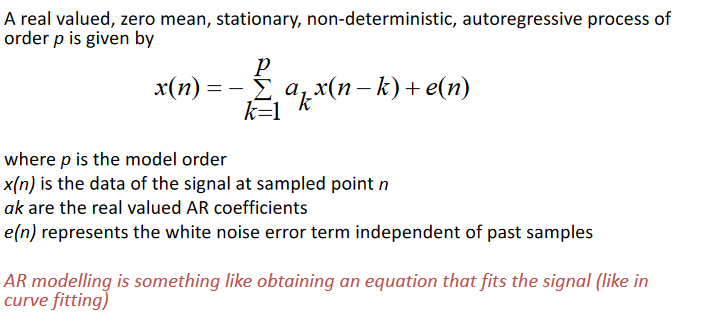

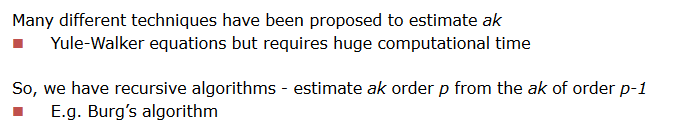
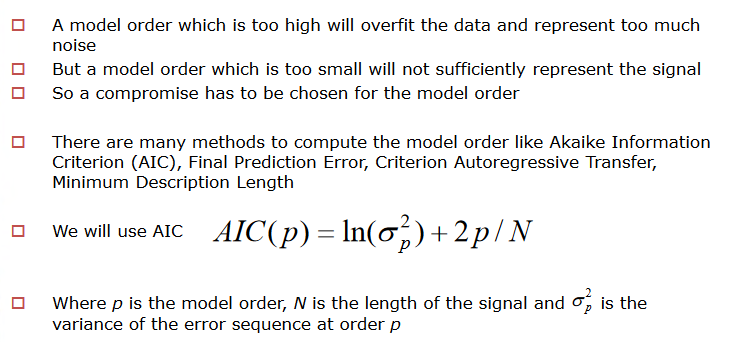




In [5]:
!pip install spectrum

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 230 kB 1.9 MB/s 
     |████████████████████████████████| 47 kB 4.1 MB/s 
  Created wheel for spectrum: filename=spectrum-0.8.1-cp37-cp37m-linux_x86_64.whl size=235156 sha256=f8a559195dc0282a4b58390f9c1ae77b25709960b78ebfcea861178357faaf37
  Stored in directory: /root/.cache/pip/wheels/79/db/9c/92fa684ca088447807d08672e7609b48102c6161ac9c7e3c62
  Created wheel for easydev: filename=easydev-0.12.0-py3-none-any.whl size=64232 sha256=f36edc9eea31564b9890bc2f8eb9344230104db6a281bf8b1e496a03726d8ddc
  Stored in directory: /root/.cache/pip/wheels/82/ab/83/fdfc4017ea44a585b6754752cc5f63f2d0d63fcc1317e7174b
Successfully built spectrum easydev


In [9]:
import spectrum
from spectrum import  arburg
import pylab

In [114]:
order= range(1,20)

In [115]:
P =[]
for i in order:
   P.append(arburg(ECG,i) [1])

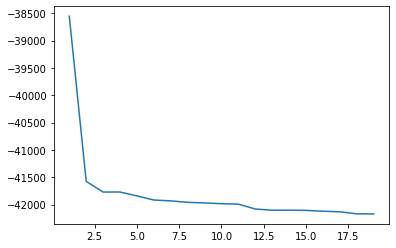

In [30]:
pylab.plot(order, spectrum.AIC(len(ECG),P, order), label='AIC')

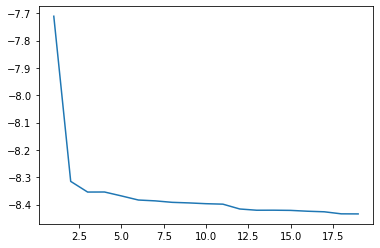

In [133]:
pylab.plot(order, (np.log(P)+2*np.array(order)/len(ECG)), label='AIC')

In [146]:
#index of minmum AIC method1
from numpy.ma.core import argmin, argmax
argmin(P)

18

In [147]:
#index of minmum AIC method2
AIC=(np.log(P)+2*np.array(order)/len(ECG))
minAIC=min(AIC)
indexOfMinAIC=np.where(AIC==minAIC)[0]
indexOfMinAIC

array([18])

In [134]:
ar=arburg(ECG,18)[0]

In [135]:
ar

array([-1.48902971+0.j,  0.25392964+0.j,  0.19268554+0.j,  0.13970747+0.j,
        0.07950291+0.j, -0.16795867+0.j, -0.08183061+0.j,  0.08946445+0.j,
        0.00747389+0.j, -0.02410811+0.j,  0.11221962+0.j, -0.04849458+0.j,
       -0.09894217+0.j,  0.07100593+0.j,  0.08462493+0.j, -0.10977109+0.j,
       -0.08229152+0.j,  0.08851635-0.j])

## Example from the lecture 

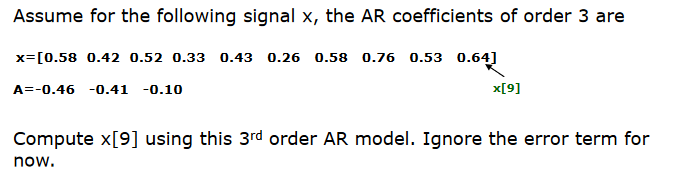

In [35]:
x=[0.58, 0.42, 0.52, 0.33, 0.43, 0.26, 0.58, 0.76, 0.53, 0.64]

In [137]:
ar=arburg(x,3) [0]

In [138]:
Predict_ninth_sample=(-ar[0]*x[8]-ar[1]*x[7]-ar[2]*x[6])

In [139]:
e= x[9]-Predict_ninth_sample
e

(0.027945250599591298+0j)

## Hjorth descriptors
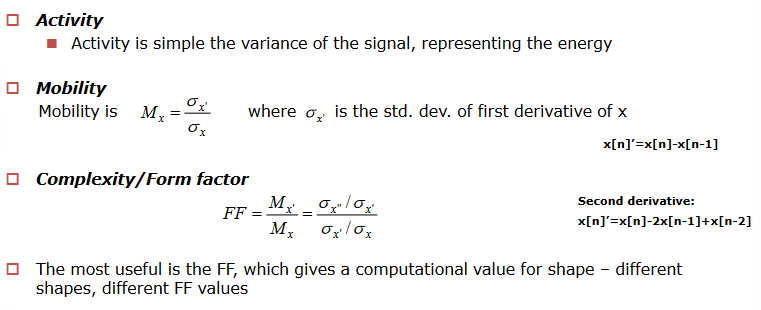

In [106]:
#Activity 
Activity=np.var(ECG)
Activity

0.016933302623999884

In [104]:
#Mobility
#std ddof= 1 to have the same result in matlab 
ECG1=[]
for i in range(2,len(ECG)):
  ECG1.append(ECG[i]-ECG[i-1])

Mobility=np.std(ECG1,ddof=1)/np.std(ECG, ddof=1)
Mobility

0.16316093812258967

In [112]:
#Complexity/Form factor
ECG2=[]
for i in range(3,len(ECG)):
  ECG2.append(ECG[i]-2*ECG[i-1]+ECG[i-2])

FF=(np.std(ECG2)/np.std(ECG1))/(np.std(ECG1)/np.std(ECG))
FF

5.035498692943939

# PSD Power Spectrum Density

In [153]:
import matplotlib.pyplot as plt

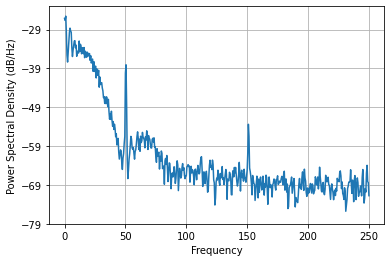

In [177]:
power, freqs=plt.psd(ECG, 1000,1/0.002)
plt.show()

In [178]:
#peak frequency
argmax(power)

2

In [183]:
#value 
power[2]

0.002782949170692925

In [184]:
max(power)

0.002782949170692925

How to find more about any function ?

In [185]:
plt.psd?

In [187]:
help(plt.psd)

Help on function psd in module matplotlib.pyplot:

psd(x, NFFT=None, Fs=None, Fc=None, detrend=None, window=None, noverlap=None, pad_to=None, sides=None, scale_by_freq=None, return_line=None, *, data=None, **kwargs)
    Plot the power spectral density.
    
    The power spectral density :math:`P_{xx}` by Welch's average
    periodogram method.  The vector *x* is divided into *NFFT* length
    segments.  Each segment is detrended by function *detrend* and
    windowed by function *window*.  *noverlap* gives the length of
    the overlap between segments.  The :math:`|\mathrm{fft}(i)|^2`
    of each segment :math:`i` are averaged to compute :math:`P_{xx}`,
    with a scaling to correct for power loss due to windowing.
    
    If len(*x*) < *NFFT*, it will be zero padded to *NFFT*.
    
    Parameters
    ----------
    x : 1-D array or sequence
        Array or sequence containing the data
    
    Fs : scalar
        The sampling frequency (samples per time unit).  It is used
        